In [1]:
using Plots
using LinearAlgebra

In [2]:
#Solving for the critical points analytically
#The crtical points are as (0,0) , (0,1), (1,0) 

In [3]:
function ode_phi_solve(cxi,cyi)
Ni=1000
dt=0.01
xi=zeros(Ni)
yi=zeros(Ni)
    
xi[1]=cxi
yi[1]=cyi
    
for i in range(1,Ni-1,step=1)
    xi[i+1]=xi[i]-dt*xi[i]*(1-xi[i]+3*yi[i])
    yi[i+1]=yi[i]+dt*yi[i]*(3+xi[i]-3*yi[i])
end
return xi,yi
end

ode_phi_solve (generic function with 1 method)

# Plotting the trajectory in the phase space X(t) and Y(t) of the ASODE (13) corresponding to the ΛCDM model

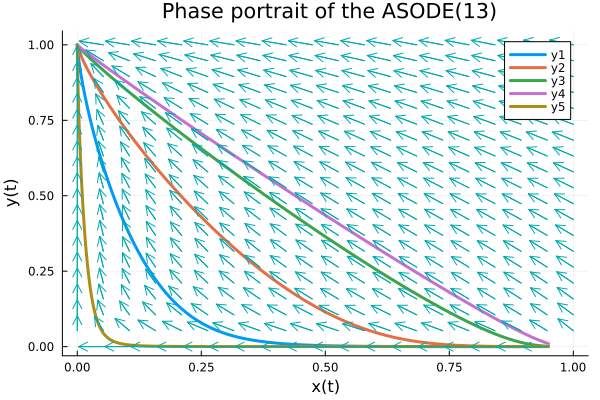

In [22]:
xdata,ydata = ode_phi_solve(0.90,0.000001)
plot(xdata,ydata,linewidth = 3)

xdata,ydata = ode_phi_solve(0.90,0.0001)
plot!(xdata,ydata,linewidth = 3)

xdata,ydata = ode_phi_solve(0.95,0.001)
plot!(xdata,ydata,linewidth = 3)

xdata,ydata = ode_phi_solve(0.95,0.01)
plot!(xdata,ydata,linewidth = 3)

xdata,ydata = ode_phi_solve(0.95,0.0000000001)
plot!(xdata,ydata,linewidth = 3)

function vect(x,y)
    u = -x*(1-x+3*y)
    v = (3 + x − 3*y)*y
    scale = 20
    norm = sqrt(u^2+v^2)*scale
    return u/norm,v/norm
end

Np=20
x=range(0,1,length=Np)
vector = vec([(x[i],x[j]) for i=1:length(x), j=1:length(x)])
quiver!(vector,quiver=vect)
title!(" Phase portrait of the ASODE(13)")
xlabel!("x(t)")
ylabel!("y(t)")

In [15]:
function ode_solve(cpi,cti,coi)
Ni=10000
dt=0.001
xi=zeros(Ni)
yi=zeros(Ni)
zi=zeros(Ni)
xi[1]=cpi
yi[1]=cti
zi[1]=coi
mu=10
for i in range(1,Ni-1,step=1)

    xi[i+1]=xi[i]-(1.5*xi[i]*(1-xi[i]^2+yi[i]^2)+sqrt(1.5)*zi[i]*(yi[i]^2) )*dt
    yi[i+1]=yi[i]+dt*(1.5*yi[i]*(1+xi[i]^2-yi[i]^2) + sqrt(1.5)*(xi[i]*yi[i]*zi[i]))
    zi[i+1]=zi[i]+dt*(sqrt(6)*(mu^2-zi[i]^2)*xi[i])
end
    return xi,yi,zi
end

ode_solve (generic function with 1 method)

# Plotting the phase portrait of the ASODE (31) – showing two orbits generated by two different sets of initial conditions


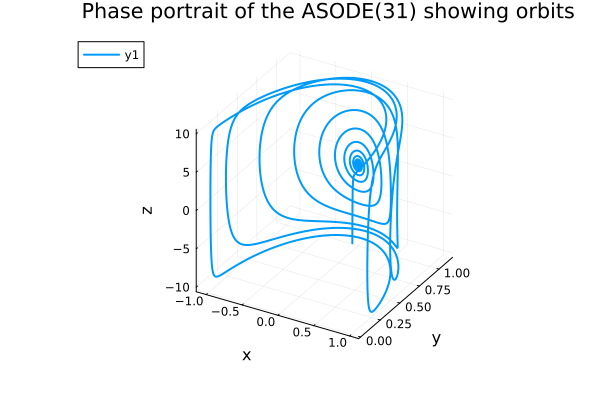

In [21]:
x_2data,y_2data,z_2data = ode_solve(1.0,0.01,1.2)
plot(x_2data,y_2data,z_2data,linewidth=2)
title!(" Phase portrait of the ASODE(31) showing orbits")
xlabel!("x")
ylabel!("y")
zlabel!("z")